## Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)df

### Principal Component Analysis (PCA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\ExcelR\\Data Science Assignments\\8_PCA\\wine.csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# Normalizing data set

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [5]:
scaled_data = scaler.transform(data)
scaled_data

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [10]:
# Building Model

pca = PCA(n_components=14)
pca_values = pca.fit_transform(scaled_data)

In [11]:
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [12]:
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

In [13]:
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

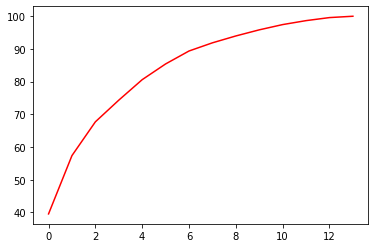

In [16]:
# Variance pl0t for pca components : 
plt.plot(var1,color="red")

In [18]:
pca_values[:,0:3]

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01],
       [-3.92258841e+00, -2.76821026e+00, -1.74968168e-01],
       [-1.40751111e+00, -8.67773087e-01,  2.02582949e+00],
       [-3.28812981e+00, -2.13017513e+00, -6.28992339e-01],
       [-2.75057754e+00, -1.17916999e+00, -9.77337471e-01],
       [-2.39286652e+00, -1.61128232e+00,  1.45729462e-01],
       [-2.79525633e+00, -9.23179517e-01, -1.77092548e+00],
       [-3.00559666e+00, -7.96284169e-01, -9.83741629e-01],
       [-3.67868855e+00, -1.31252342e+00, -4.21854170e-01],
       [-2.10963477e+00, -6.12981986e-01, -1.19156995e+00],
       [-2.43845636e+00, -6.78523310e-01, -8.65513701e-01],
       [-3.67349453e+00, -1.14012136e+00, -1.20376870e+00],
       [-4.44157575e+00, -2.11031917e+00, -1.26245041e+00],
       [-2.60892387e+00, -1.66641801e+00,  2.17632760e-01],
       [-2.47542846e+00, -2.33089672e+00

C:\Users\Lenovo\anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


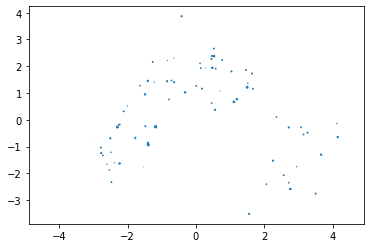

In [21]:
# plot between pca1,pca2 and pca3 :
x = pca_values[:,0:1]
y = pca_values[:,1:2]
z = pca_values[:,2:3]
plt.scatter(x,y,z)

In [25]:
final_data = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=["pc1","pc2","pc3"]),data[["Type"]]],axis=1)
final_data

,pc1,pc2,pc3,Type
0,-3.522934,-1.453098,-0.164795,1
1,-2.528858,0.330019,-2.026707,1
2,-2.785029,-1.036936,0.983238,1
3,-3.922588,-2.768210,-0.174968,1
4,-1.407511,-0.867773,2.025829,1
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,3
174,2.942729,-1.752263,0.207480,3
175,3.027272,-2.756040,-0.940803,3
176,2.755222,-2.293784,-0.550474,3


### Heirarchical Clustering

In [29]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [33]:
final_data

,pc1,pc2,pc3,Type
0,-3.522934,-1.453098,-0.164795,1
1,-2.528858,0.330019,-2.026707,1
2,-2.785029,-1.036936,0.983238,1
3,-3.922588,-2.768210,-0.174968,1
4,-1.407511,-0.867773,2.025829,1
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,3
174,2.942729,-1.752263,0.207480,3
175,3.027272,-2.756040,-0.940803,3
176,2.755222,-2.293784,-0.550474,3


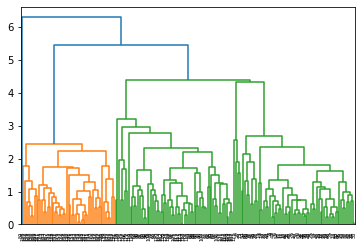

In [32]:
# Creating Dendrogram :
dendrogram = sch.dendrogram(sch.linkage(final_data,method="average"))

In [37]:
# Creating Clusters :
hc = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="average")

In [38]:
# Save clusters for chart :
y_hc = hc.fit_predict(final_data)
clusters = pd.DataFrame(y_hc, columns = ["Clusters"])

In [39]:
final_data["h_clusterid"] = clusters

In [41]:
final_data.sort_values("h_clusterid")

,pc1,pc2,pc3,Type,h_clusterid
0,-3.522934,-1.453098,-0.164795,1,0
96,0.555473,0.370127,1.309239,2,0
95,-2.260607,-0.184286,0.791708,2,0
94,-0.836145,2.217549,0.143653,2,0
93,-0.653304,2.308393,0.115558,2,0
...,...,...,...,...,...
148,3.133650,-1.564646,-0.472736,3,2
149,3.234714,-2.035324,-0.495851,3,2
150,2.712565,-2.353880,0.438394,3,2
140,3.071645,-0.279806,0.608808,3,2


In [45]:
final_data.iloc[:,:].groupby(final_data.h_clusterid).mean()

,pc1,pc2,pc3,Type
h_clusterid,,,,
0,-1.177731,0.438493,0.103790,1.539062
1,0.874925,3.077724,-4.585646,2.000000
2,3.058665,-1.208263,-0.177541,2.979592


In [47]:
hc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average").fit(final_data)
cluster_labels = pd.Series(hc.labels_)

In [48]:
data["clusterid"]=cluster_labels
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [49]:
data.iloc[:,:].groupby(data.clusterid).mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clusterid,,,,,,,,,,,,,,
0,1.539062,12.947734,1.961328,2.348281,18.820312,100.109375,2.533750,2.512031,0.328437,1.763828,4.207578,1.060672,2.970625,794.351562
1,2.000000,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.950000,1.050000,1.820000,520.000000
2,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020


### K-Means Clustering

In [51]:
from sklearn.cluster import KMeans

In [60]:
f_data = final_data.iloc[:,0:4]
f_data

,pc1,pc2,pc3,Type
0,-3.522934,-1.453098,-0.164795,1
1,-2.528858,0.330019,-2.026707,1
2,-2.785029,-1.036936,0.983238,1
3,-3.922588,-2.768210,-0.174968,1
4,-1.407511,-0.867773,2.025829,1
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,3
174,2.942729,-1.752263,0.207480,3
175,3.027272,-2.756040,-0.940803,3
176,2.755222,-2.293784,-0.550474,3


In [61]:
wcss=[]
for i in range(1,14):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(f_data)
    wcss.append(kmeans.inertia_)
wcss

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1793.5997592713204,
 966.0536571196982,
 495.06500146267916,
 411.27618958706154,
 365.02389409760576,
 321.15274142040323,
 283.5592177208827,
 256.50009660198754,
 234.44948824857525,
 210.17217907617888,
 198.42214226943787,
 186.8339068090803,
 171.80476025514892]

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

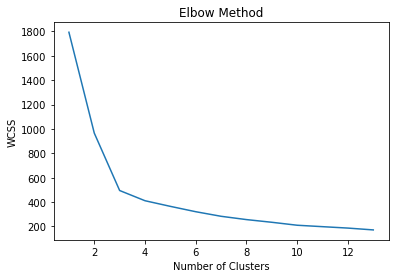

In [62]:
wcss=[]
for i in range(1,14):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(f_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,14),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [64]:
# Building Cluster Algorithm

cluster_new = KMeans(3,random_state=42)
cluster_new.fit(f_data)

KMeans(n_clusters=3, random_state=42)

In [66]:
cluster_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [67]:
f_data["clusterid_new"]=cluster_new.labels_

In [68]:
f_data.groupby("clusterid_new").agg(["mean"]).reset_index()

,clusterid_new,pc1,pc2,pc3,Type
,,mean,mean,mean,mean
0,0,3.058665,-1.208263,-0.177541,2.979592
1,1,-2.548859,-0.936610,0.001632,1.048387
2,2,0.121711,1.750369,0.128334,2.000000


In [69]:
f_data[f_data["clusterid_new"]==1]

,pc1,pc2,pc3,Type,clusterid_new
0,-3.522934,-1.453098,-0.164795,1,1
1,-2.528858,0.330019,-2.026707,1,1
2,-2.785029,-1.036936,0.983238,1,1
3,-3.922588,-2.768210,-0.174968,1,1
4,-1.407511,-0.867773,2.025829,1,1
...,...,...,...,...,...
57,-2.488147,-1.215493,0.261493,1,1
58,-3.351287,-1.740603,-0.284735,1,1
73,-2.299457,-0.274359,3.376817,2,1
95,-2.260607,-0.184286,0.791708,2,1
